In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
comp_df = pd.read_csv('Dataset.csv')
comp_df = comp_df.rename(columns = {"Sales ('000, USD)": "Sales"})
comp_df

,Order ID,Customer Name,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin
0,1,Jones,A,South,500,12/01/18 02:00,12/06/18 18:59,False,referral
1,2,Kivell,B,East,400,12/01/18 12:23,12/06/18 19:54,False,display
2,3,James,G,North,100,12/01/18 13:49,13/06/18 16:37,False,social
3,4,Jack,F,West,200,12/01/18 16:07,14/06/18 14:30,False,social
4,5,Anny,B,Central,250,12/01/18 18:25,14/06/18 15:43,True,other
...,...,...,...,...,...,...,...,...,...
145,146,Thompson,C,South,300,22/02/18 21:25,01/11/18 15:36,False,social
146,147,Mathew,C,Central,110,23/02/18 11:40,06/11/18 19:41,False,organic_search
147,148,Gill,F,East,335,23/02/18 12:03,09/11/18 20:06,False,paid_search
148,149,Amy,A,South,235,23/02/18 13:54,12/11/18 19:17,False,social


In [ ]:
comp_df.Sales.sum()

43355

In [ ]:
comp_df.Origin.unique()

array(['referral', 'display', 'social', 'other', 'paid_search', 'unknown',
       'email', 'direct_traffic', 'organic_search'], dtype=object)

In [ ]:
!pip install pandasql
from pandasql import sqldf

  Created wheel for pandasql: filename=pandasql-0.7.3-cp37-none-any.whl size=26784 sha256=058f0b1cf2d2a5993365a465aab90c9519464983cda9626e27b8d32518dea819
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [ ]:
sqldf("SELECT * FROM comp_df WHERE Refunded == 1 ;", globals())

,Order ID,Customer Name,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin
0,5,Anny,B,Central,250,12/01/18 18:25,14/06/18 15:43,1,other
1,20,Mack,F,Central,200,19/01/18 02:00,21/06/18 12:21,1,paid_search
2,35,Kivell,F,East,200,23/01/18 12:41,04/07/18 15:07,1,unknown
3,57,Kivell,B,East,320,30/01/18 11:33,20/07/18 18:18,1,paid_search
4,82,Thompson,B,South,400,06/02/18 02:00,17/08/18 14:41,1,organic_search
5,120,Morgan,C,North,110,15/02/18 16:06,26/09/18 11:48,1,social
6,135,Smith,A,Central,500,20/02/18 19:40,24/10/18 11:33,1,unknown


In [ ]:
referral_df = sqldf("SELECT [Order ID] FROM comp_df WHERE Origin == 'referral' ;", globals())
display_df = sqldf("SELECT [Order ID] FROM comp_df WHERE Origin == 'display' ;", globals())
social_df = sqldf("SELECT [Order ID] FROM comp_df WHERE Origin == 'social' ;", globals())
other_df = sqldf("SELECT [Order ID] FROM comp_df WHERE Origin == 'other' ;", globals())
paid_search_df = sqldf("SELECT [Order ID] FROM comp_df WHERE Origin == 'paid_search' ;", globals())
unknown_df = sqldf("SELECT [Order ID] FROM comp_df WHERE Origin == 'unknown' ;", globals())
email_df = sqldf("SELECT [Order ID] FROM comp_df WHERE Origin == 'email' ;", globals())
direct_traffic_df = sqldf("SELECT [Order ID] FROM comp_df WHERE Origin == 'direct_traffic' ;", globals())
organic_search_df = sqldf("SELECT [Order ID] FROM comp_df WHERE Origin == 'organic_search' ;", globals())

In [ ]:
origin_counts = np.array([social_df.shape[0], 
                   organic_search_df.shape[0],
                   paid_search_df.shape[0],
                   unknown_df.shape[0],
                   email_df.shape[0],
                   direct_traffic_df.shape[0],
                   referral_df.shape[0],
                   display_df.shape[0],
                   other_df.shape[0]
                   ])
 
origin_labels = ["Social", "Organic Search", "Paid Search", "Unknown", "Email", "Direct Traffic", "Referral", "Display", "Other" ]
pie_expload = [0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02]

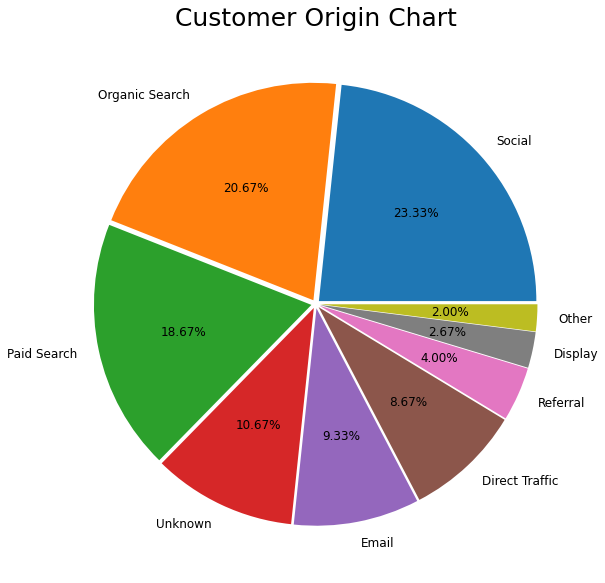

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})
sns.color_palette("husl", 9)
plt.pie(origin_counts, labels = origin_labels, explode = pie_expload, autopct='%1.2f%%')
plt.title("Customer Origin Chart", fontsize=25)
plt.show() 

In [ ]:
comp_df['Origin'].value_counts()

social            35
organic_search    31
paid_search       28
unknown           16
email             14
direct_traffic    13
referral           6
display            4
other              3
Name: Origin, dtype: int64

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7fe4995ccc10>>

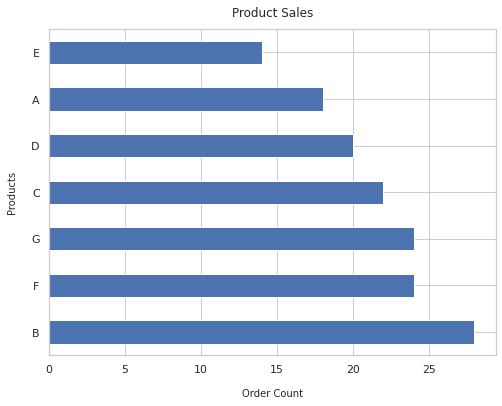

In [ ]:
fig = comp_df['Product'].value_counts().plot(kind='barh', figsize=(8, 6))
sns.set_theme(style="whitegrid")
sns.set_color_codes("dark")
plt.rcParams.update({'font.size': 20})
plt.xlabel("Order Count", labelpad=14)
plt.ylabel("Products", labelpad=14)
plt.title("Product Sales", y=1.02);
fig.plot

In [ ]:
comp_df['Product'].value_counts()

B    28
F    24
G    24
C    22
D    20
A    18
E    14
Name: Product, dtype: int64

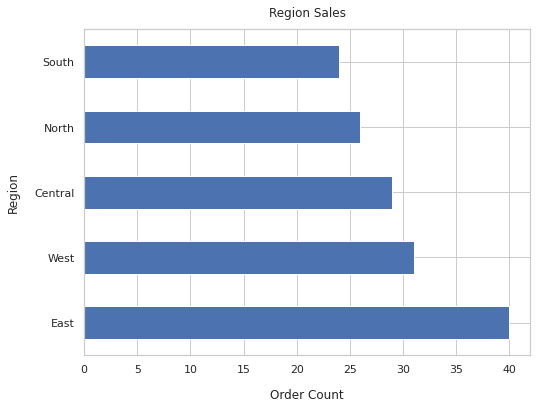

In [ ]:
comp_df['Region'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Order Count", labelpad=14)
plt.ylabel("Region", labelpad=14)
plt.title("Region Sales", y=1.02);

In [ ]:
x = comp_df['Customer Name'].value_counts()
x

Smith       15
Kivell      15
Jack        14
Jardine     13
Morgan      11
Thompson    10
Sorvina      9
James        9
Andrew       8
Jones        7
Anny         7
Gill         7
Amy          7
Daisy        6
Rebecca      4
Mack         3
Elena        2
Mathew       1
Jonshon      1
Isle         1
Name: Customer Name, dtype: int64

In [ ]:
x[:10]

Smith       15
Kivell      15
Jack        14
Jardine     13
Morgan      11
Thompson    10
Sorvina      9
James        9
Andrew       8
Jones        7
Name: Customer Name, dtype: int64

In [ ]:
loyal_cust =sqldf("SELECT [Customer Name], Region, Origin, COUNT([Order ID]) AS Count FROM comp_df GROUP BY [Customer Name]  HAVING COUNT([Order ID])>0", globals())
loyal_cust.sort_values('Count', ascending=False)

,Customer Name,Region,Origin,Count
17,Smith,Central,organic_search,15
12,Kivell,East,organic_search,15
7,Jack,West,email,14
9,Jardine,East,organic_search,13
15,Morgan,North,organic_search,11
19,Thompson,South,social,10
18,Sorvina,West,direct_traffic,9
8,James,North,organic_search,9
1,Andrew,West,social,8
0,Amy,South,social,7


In [ ]:
kv=sqldf("Select * FROM comp_df where [Customer Name] =='Kivell'")
kv['Product'].value_counts()

A    3
B    3
G    3
E    2
F    2
C    2
Name: Product, dtype: int64

In [ ]:
sm=sqldf("Select * FROM comp_df where [Customer Name] =='Smith'")
sm['Product'].value_counts()

B    4
A    3
C    3
G    2
D    2
F    1
Name: Product, dtype: int64

In [ ]:
jk=sqldf("Select * FROM comp_df where [Customer Name] =='Jack'")
jk['Product'].value_counts()

E    4
D    4
C    3
G    2
F    1
Name: Product, dtype: int64

In [ ]:
jd=sqldf("Select * FROM comp_df where [Customer Name] =='Jardine'")
jd['Product'].value_counts()

G    4
B    2
E    2
C    2
A    1
F    1
D    1
Name: Product, dtype: int64

In [ ]:
mg=sqldf("Select * FROM comp_df where [Customer Name] =='Morgan'")
mg['Product'].value_counts()

D    3
G    2
C    2
B    1
F    1
A    1
E    1
Name: Product, dtype: int64

In [ ]:
tp=sqldf("Select * FROM comp_df where [Customer Name] =='Thompson'")
tp['Product'].value_counts()

C    4
B    3
G    1
D    1
F    1
Name: Product, dtype: int64

In [ ]:
js=sqldf("Select * FROM comp_df where [Customer Name] =='James'")
js['Product'].value_counts()

F    3
B    2
G    2
A    1
E    1
Name: Product, dtype: int64

In [ ]:
sr=sqldf("Select * FROM comp_df where [Customer Name] =='Sorvina'")
sr['Product'].value_counts()

A    3
B    2
G    2
D    1
C    1
Name: Product, dtype: int64

In [ ]:
ad=sqldf("Select * FROM comp_df where [Customer Name] =='Andrew'")
ad['Product'].value_counts()

D    3
F    2
B    1
G    1
C    1
Name: Product, dtype: int64

In [ ]:
am=sqldf("Select * FROM comp_df where [Customer Name] =='Amy'")
am['Product'].value_counts()

A    2
F    2
B    1
G    1
C    1
Name: Product, dtype: int64

In [ ]:
comp_df["Registered At"] = pd.to_datetime(comp_df["Registered At"])
comp_df["Purchased At"] = pd.to_datetime(comp_df["Purchased At"])

In [ ]:
comp_df

,Order ID,Customer Name,Product,Region,Sales,Registered At,Purchased At,Refunded,Origin
0,1,Jones,A,South,500,2018-12-01 02:00:00,2018-12-06 18:59:00,False,referral
1,2,Kivell,B,East,400,2018-12-01 12:23:00,2018-12-06 19:54:00,False,display
2,3,James,G,North,100,2018-12-01 13:49:00,2018-06-13 16:37:00,False,social
3,4,Jack,F,West,200,2018-12-01 16:07:00,2018-06-14 14:30:00,False,social
4,5,Anny,B,Central,250,2018-12-01 18:25:00,2018-06-14 15:43:00,True,other
...,...,...,...,...,...,...,...,...,...
145,146,Thompson,C,South,300,2018-02-22 21:25:00,2018-01-11 15:36:00,False,social
146,147,Mathew,C,Central,110,2018-02-23 11:40:00,2018-06-11 19:41:00,False,organic_search
147,148,Gill,F,East,335,2018-02-23 12:03:00,2018-09-11 20:06:00,False,paid_search
148,149,Amy,A,South,235,2018-02-23 13:54:00,2018-12-11 19:17:00,False,social


In [ ]:
comp_df['Reg_Date']= pd.DatetimeIndex(comp_df["Registered At"]).date
comp_df['Reg_Time']= pd.DatetimeIndex(comp_df["Registered At"]).time
comp_df['Purchase_Date']= pd.DatetimeIndex(comp_df["Purchased At"]).date
comp_df['Purchase_Time']= pd.DatetimeIndex(comp_df["Purchased At"]).time

In [ ]:
df = comp_df.drop('Registered At',axis='columns')
df = df.drop('Purchased At',axis='columns')

In [ ]:
df

,Order ID,Customer Name,Product,Region,Sales,Refunded,Origin,Reg_Date,Reg_Time,Purchase_Date,Purchase_Time
0,1,Jones,A,South,500,False,referral,2018-12-01,02:00:00,2018-12-06,18:59:00
1,2,Kivell,B,East,400,False,display,2018-12-01,12:23:00,2018-12-06,19:54:00
2,3,James,G,North,100,False,social,2018-12-01,13:49:00,2018-06-13,16:37:00
3,4,Jack,F,West,200,False,social,2018-12-01,16:07:00,2018-06-14,14:30:00
4,5,Anny,B,Central,250,True,other,2018-12-01,18:25:00,2018-06-14,15:43:00
...,...,...,...,...,...,...,...,...,...,...,...
145,146,Thompson,C,South,300,False,social,2018-02-22,21:25:00,2018-01-11,15:36:00
146,147,Mathew,C,Central,110,False,organic_search,2018-02-23,11:40:00,2018-06-11,19:41:00
147,148,Gill,F,East,335,False,paid_search,2018-02-23,12:03:00,2018-09-11,20:06:00
148,149,Amy,A,South,235,False,social,2018-02-23,13:54:00,2018-12-11,19:17:00


In [ ]:
df['Reg2Pur'] = (df['Reg_Date'] - df['Purchase_Date']).dt.days
df

,Order ID,Customer Name,Product,Region,Sales,Refunded,Origin,Reg_Date,Reg_Time,Purchase_Date,Purchase_Time,Reg2Pur
0,1,Jones,A,South,500,False,referral,2018-12-01,02:00:00,2018-12-06,18:59:00,-5
1,2,Kivell,B,East,400,False,display,2018-12-01,12:23:00,2018-12-06,19:54:00,-5
2,3,James,G,North,100,False,social,2018-12-01,13:49:00,2018-06-13,16:37:00,171
3,4,Jack,F,West,200,False,social,2018-12-01,16:07:00,2018-06-14,14:30:00,170
4,5,Anny,B,Central,250,True,other,2018-12-01,18:25:00,2018-06-14,15:43:00,170
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,Thompson,C,South,300,False,social,2018-02-22,21:25:00,2018-01-11,15:36:00,42
146,147,Mathew,C,Central,110,False,organic_search,2018-02-23,11:40:00,2018-06-11,19:41:00,-108
147,148,Gill,F,East,335,False,paid_search,2018-02-23,12:03:00,2018-09-11,20:06:00,-200
148,149,Amy,A,South,235,False,social,2018-02-23,13:54:00,2018-12-11,19:17:00,-291


In [ ]:
df['Purchase_Month'] = pd.DatetimeIndex(df["Purchase_Date"]).month

In [ ]:
kv_data=sqldf("Select * FROM df where [Customer Name] =='Kivell'")
kv_data

,Order ID,Customer Name,Product,Region,Sales,Refunded,Origin,Reg_Date,Reg_Time,Purchase_Date,Purchase_Time,Reg2Pur,Purchase_Month
0,2,Kivell,B,East,400,0,display,2018-12-01,12:23:00.000000,2018-12-06,19:54:00.000000,-5,12
1,13,Kivell,G,East,550,0,social,2018-01-17,12:11:00.000000,2018-06-19,12:36:00.000000,-153,6
2,31,Kivell,A,East,350,0,social,2018-01-22,17:11:00.000000,2018-02-07,13:40:00.000000,-16,2
3,35,Kivell,F,East,200,1,unknown,2018-01-23,12:41:00.000000,2018-04-07,15:07:00.000000,-74,4
4,49,Kivell,A,East,500,0,paid_search,2018-01-29,10:35:00.000000,2018-07-13,20:14:00.000000,-165,7
5,57,Kivell,B,East,320,1,paid_search,2018-01-30,11:33:00.000000,2018-07-20,18:18:00.000000,-171,7
6,61,Kivell,F,East,320,0,unknown,2018-01-30,17:39:00.000000,2018-07-26,17:03:00.000000,-177,7
7,85,Kivell,E,East,550,0,social,2018-06-02,16:11:00.000000,2018-08-20,13:59:00.000000,-79,8
8,89,Kivell,A,East,500,0,organic_search,2018-07-02,13:57:00.000000,2018-08-21,12:30:00.000000,-50,8
9,94,Kivell,G,East,350,0,email,2018-07-02,20:39:00.000000,2018-08-24,03:00:00.000000,-53,8


In [ ]:
kv_data=sqldf("Select * FROM df where [Customer Name] =='Kivell'")
kv_data = kv_data.groupby("Purchase_Month").agg({"Sales": np.sum})
kv_data['Purchase_Month']= kv_data.index
kv_data

,Sales,Purchase_Month
Purchase_Month,,
2,350,2
4,320,4
6,550,6
7,1140,7
8,1720,8
9,220,9
10,415,10
12,400,12


Text(0.5, 1.0, 'Purchase pattern of Loyal customers')

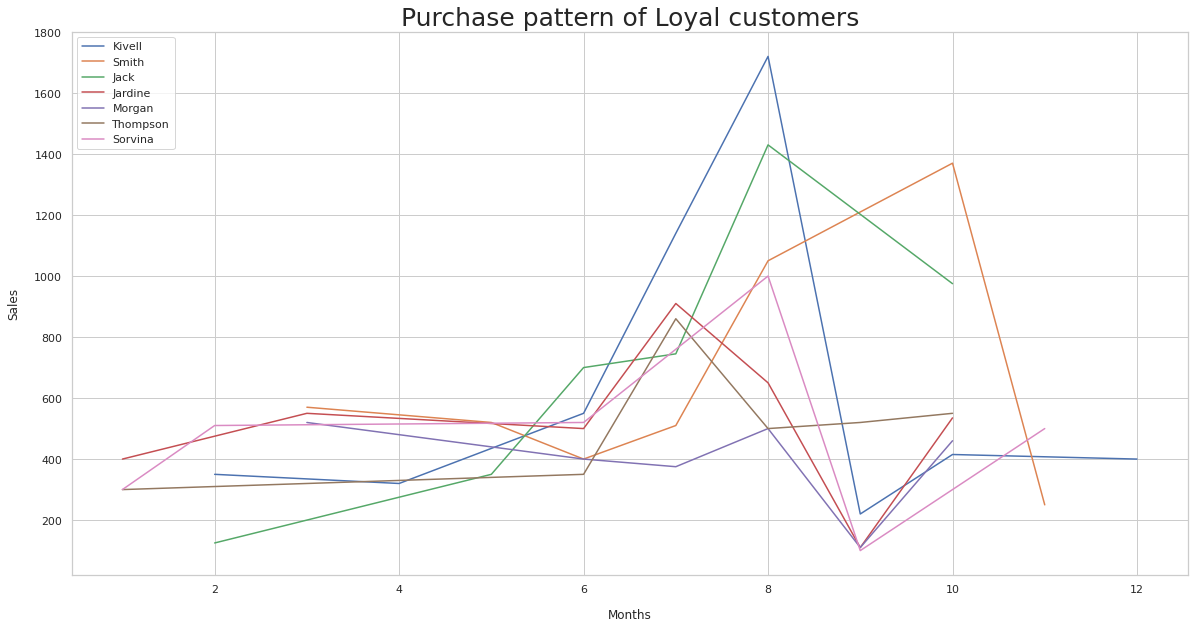

In [ ]:
kv_data=sqldf("Select * FROM df where [Customer Name] =='Kivell'")
kv_data = kv_data.groupby("Purchase_Month").agg({"Sales": np.sum})
kv_data['Purchase_Month']= kv_data.index
sm_data=sqldf("Select * FROM df where [Customer Name] =='Smith'")
sm_data = sm_data.groupby("Purchase_Month").agg({"Sales": np.sum})
sm_data['Purchase_Month']= sm_data.index
jk_data=sqldf("Select * FROM df where [Customer Name] =='Jack'")
jk_data = jk_data.groupby("Purchase_Month").agg({"Sales": np.sum})
jk_data['Purchase_Month']= jk_data.index
jr_data=sqldf("Select * FROM df where [Customer Name] =='Jardine'")
jr_data = jr_data.groupby("Purchase_Month").agg({"Sales": np.sum})
jr_data['Purchase_Month']= jr_data.index
mr_data=sqldf("Select * FROM df where [Customer Name] =='Morgan'")
mr_data = mr_data.groupby("Purchase_Month").agg({"Sales": np.sum})
mr_data['Purchase_Month']= mr_data.index
tp_data=sqldf("Select * FROM df where [Customer Name] =='Thompson'")
tp_data = tp_data.groupby("Purchase_Month").agg({"Sales": np.sum})
tp_data['Purchase_Month']= tp_data.index
sv_data=sqldf("Select * FROM df where [Customer Name] =='Sorvina'")
sv_data = sv_data.groupby("Purchase_Month").agg({"Sales": np.sum})
sv_data['Purchase_Month']= sv_data.index

plt.plot( kv_data.Purchase_Month, kv_data.Sales, label = "Kivell")
plt.plot( sm_data.Purchase_Month, sm_data.Sales, label = "Smith")
plt.plot( jk_data.Purchase_Month, jk_data.Sales, label = "Jack")
plt.plot( jr_data.Purchase_Month, jr_data.Sales, label = "Jardine")
plt.plot( mr_data.Purchase_Month, mr_data.Sales, label = "Morgan")
plt.plot( tp_data.Purchase_Month, tp_data.Sales, label = "Thompson")
plt.plot( sv_data.Purchase_Month, sv_data.Sales, label = "Sorvina")


plt.rc('axes', labelsize=22)
plt.xlabel("Months", labelpad=14)
plt.ylabel("Sales", labelpad=14)
plt.legend(loc="upper left")

plt.title("Purchase pattern of Loyal customers", fontsize=25)

In [ ]:
comp_df['Purchase_Hour']= pd.DatetimeIndex(comp_df["Purchased At"]).hour

Text(0.5, 1.0, 'Sales based on Purchase time')

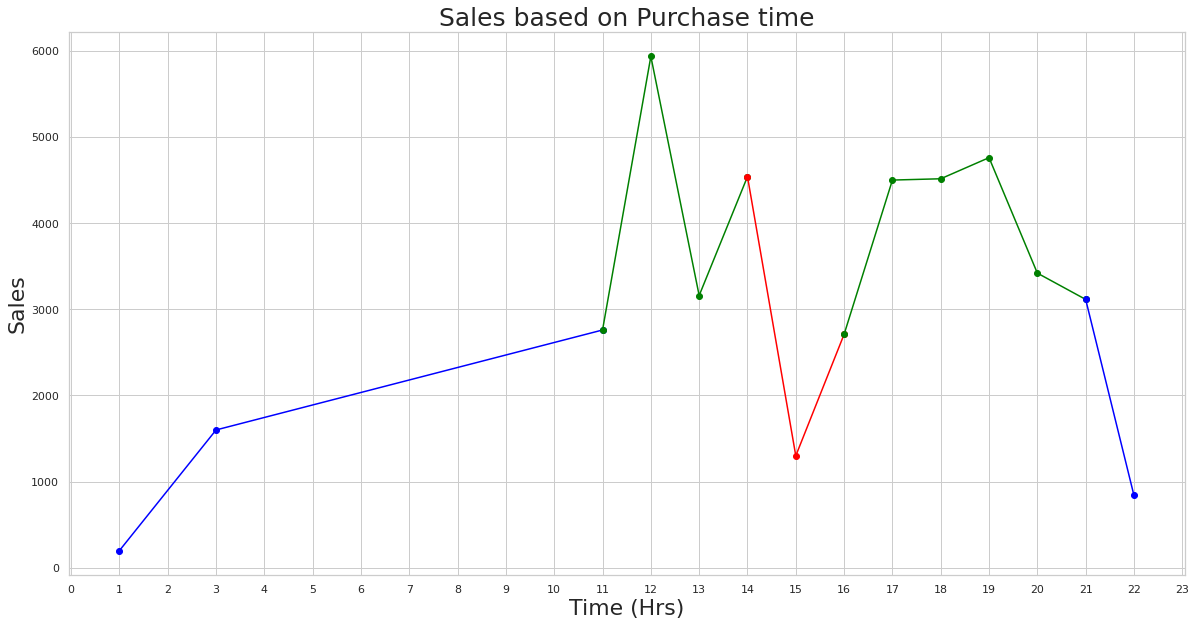

In [ ]:
time_data = comp_df.groupby("Purchase_Hour").agg({"Sales": np.sum})
time_data['Purchase_Hour']= time_data.index
plt.plot(time_data['Purchase_Hour'][:3], time_data.Sales[:3], '-o', color="Blue")
plt.plot(time_data['Purchase_Hour'][2:6], time_data.Sales[2:6], '-o', color="Green")
plt.plot(time_data['Purchase_Hour'][5:8], time_data.Sales[5:8], '-o', color="Red")
plt.plot(time_data['Purchase_Hour'][7:13], time_data.Sales[7:13], '-o', color="Green")
plt.plot(time_data['Purchase_Hour'][12:], time_data.Sales[12:], '-o', color="Blue")
plt.xticks(range(0, 24))

plt.rc('axes', labelsize=30)
plt.xlabel('Time (Hrs)')
plt.ylabel('Sales')
plt.title("Sales based on Purchase time", fontsize=25)

In [ ]:
region_data = comp_df.groupby("Region").agg({"Sales": np.sum})
region_data.sort_values('Sales', ascending=False)

,Sales
Region,
East,11960
West,9170
Central,7755
South,7695
North,6775


Text(0, 0.5, 'Region')

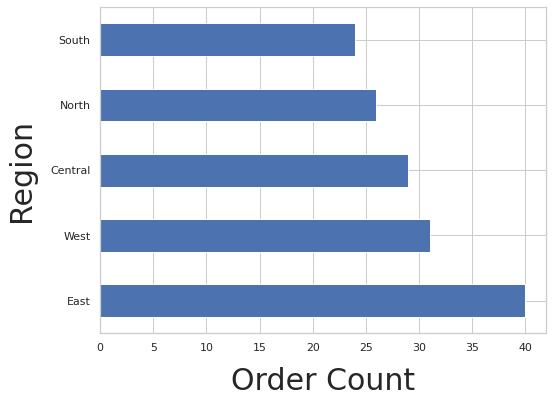

In [ ]:
comp_df['Region'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Order Count", labelpad=14)
plt.ylabel("Region", labelpad=14)

Text(0.5, 1.0, 'Search Origin Orders Time Distribution')

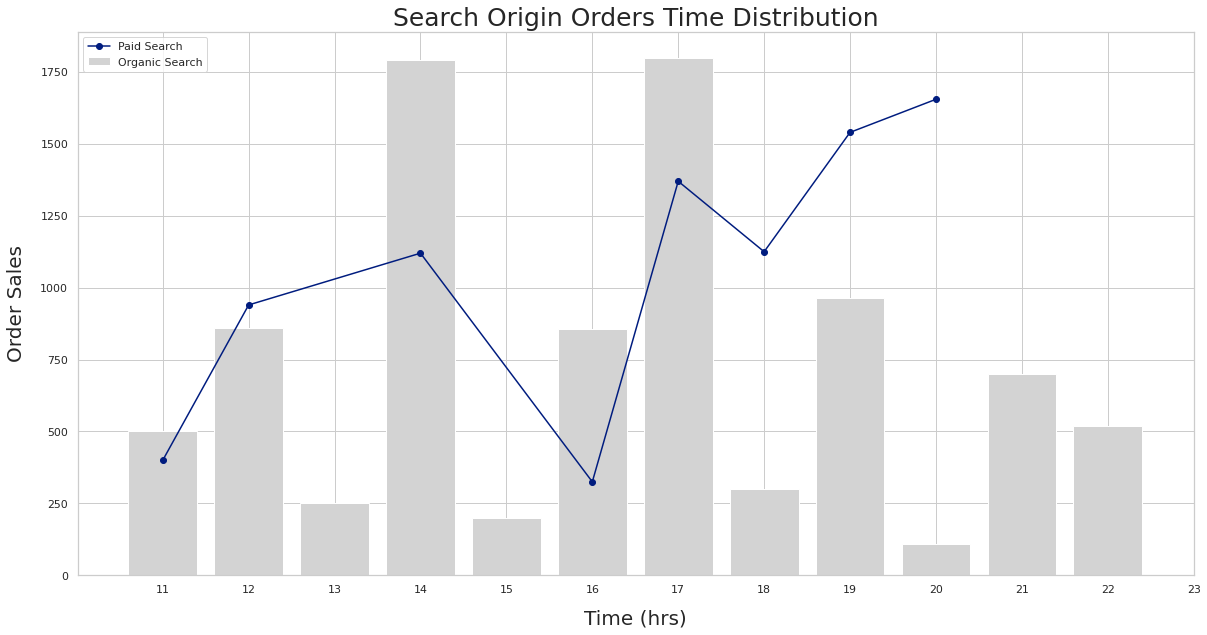

In [ ]:
os_data = sqldf("Select * FROM comp_df where [origin] =='organic_search'")
os_data = os_data.groupby("Purchase_Hour").agg({"Sales": np.sum})
os_data['Purchase_Hour']= os_data.index

plt.bar(os_data['Purchase_Hour'][1:], os_data.Sales[1:],color='lightgray', label='Organic Search')

ps_data = sqldf("Select * FROM comp_df where [origin] =='paid_search'")
ps_data = ps_data.groupby("Purchase_Hour").agg({"Sales": np.sum})
ps_data['Purchase_Hour']= ps_data.index

plt.plot(ps_data['Purchase_Hour'], ps_data.Sales,'-o',color='b', label='Paid Search')
plt.xticks(range(11, 24))
plt.legend(loc="upper left")
plt.xlabel("Time (hrs)", labelpad=14)
plt.ylabel("Order Sales", labelpad=14)
plt.rc('axes', labelsize=30)

plt.title("Search Origin Orders Time Distribution", fontsize="25")

In [ ]:
east_data = sqldf("Select * FROM df where [Region] =='East'")
east_data['Origin'].value_counts()

organic_search    11
paid_search        9
social             7
unknown            5
email              4
direct_traffic     2
display            1
referral           1
Name: Origin, dtype: int64

In [ ]:
origin_data = sqldf("Select * FROM comp_df")
origin_data = origin_data.groupby("Origin").agg({"Sales": np.sum})

In [ ]:
origin_data.sort_values('Sales', ascending=False)

,Sales
Origin,
social,10280
organic_search,9350
paid_search,8475
unknown,5125
email,3990
direct_traffic,3160
referral,1335
display,1040
other,600


In [ ]:
social_data = sqldf("Select * FROM comp_df WHERE Origin == 'social' ")
social_data['Product'].value_counts()

F    7
D    7
G    6
C    6
B    4
A    4
E    1
Name: Product, dtype: int64

In [ ]:
east_data = sqldf("Select * FROM df where [Region] =='East'")
east_data

,Order ID,Customer Name,Product,Region,Sales,Refunded,Origin,Reg_Date,Reg_Time,Purchase_Date,Purchase_Time,Reg2Pur,Purchase_Month
0,2,Kivell,B,East,400,0,display,2018-12-01,12:23:00.000000,2018-12-06,19:54:00.000000,-5,12
1,6,Gill,F,East,350,0,paid_search,2018-01-15,13:08:00.000000,2018-06-14,18:51:00.000000,-150,6
2,13,Kivell,G,East,550,0,social,2018-01-17,12:11:00.000000,2018-06-19,12:36:00.000000,-153,6
3,15,Jardine,E,East,200,0,email,2018-01-18,02:00:00.000000,2018-06-19,19:54:00.000000,-152,6
4,24,Gill,C,East,320,0,social,2018-01-19,17:23:00.000000,2018-06-26,12:51:00.000000,-158,6
5,28,Jardine,C,East,300,0,organic_search,2018-01-22,13:18:00.000000,2018-06-29,17:54:00.000000,-158,6
6,31,Kivell,A,East,350,0,social,2018-01-22,17:11:00.000000,2018-02-07,13:40:00.000000,-16,2
7,35,Kivell,F,East,200,1,unknown,2018-01-23,12:41:00.000000,2018-04-07,15:07:00.000000,-74,4
8,38,Jardine,G,East,110,0,organic_search,2018-01-24,11:33:00.000000,2018-09-07,12:54:00.000000,-226,9
9,47,Jardine,F,East,200,0,social,2018-01-26,20:25:00.000000,2018-07-13,17:38:00.000000,-168,7


In [ ]:
south_data = sqldf("Select * FROM df where [Region] =='South'")
south_data

,Order ID,Customer Name,Product,Region,Sales,Refunded,Origin,Reg_Date,Reg_Time,Purchase_Date,Purchase_Time,Reg2Pur,Purchase_Month
0,1,Jones,A,South,500,0,referral,2018-12-01,02:00:00.000000,2018-12-06,18:59:00.000000,-5,12
1,7,Amy,A,South,500,0,paid_search,2018-01-15,17:14:00.000000,2018-06-15,14:04:00.000000,-151,6
2,11,Jones,E,South,220,0,display,2018-01-16,12:36:00.000000,2018-06-18,13:51:00.000000,-153,6
3,17,Thompson,D,South,350,0,social,2018-01-18,11:22:00.000000,2018-06-20,12:24:00.000000,-153,6
4,23,Amy,B,South,400,0,paid_search,2018-01-19,16:51:00.000000,2018-06-25,19:33:00.000000,-157,6
5,26,Amy,G,South,350,0,direct_traffic,2018-01-22,02:00:00.000000,2018-06-27,15:12:00.000000,-156,6
6,27,Jones,F,South,500,0,social,2018-01-22,02:00:00.000000,2018-06-28,12:33:00.000000,-157,6
7,42,Amy,F,South,200,0,organic_search,2018-01-25,15:03:00.000000,2018-10-07,15:57:00.000000,-255,10
8,50,Thompson,B,South,350,0,organic_search,2018-01-29,11:26:00.000000,2018-07-13,21:58:00.000000,-165,7
9,54,Thompson,B,South,400,0,paid_search,2018-01-29,17:13:00.000000,2018-07-18,20:24:00.000000,-170,7


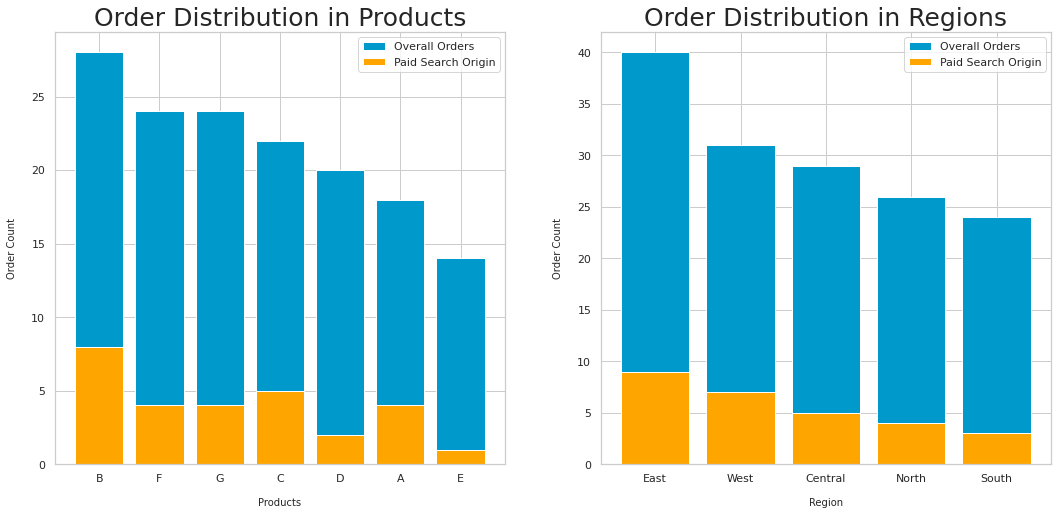

In [ ]:
gp = comp_df['Product'].value_counts()

pps_data = sqldf("Select * FROM comp_df WHERE Origin == 'paid_search' ")
x= pps_data['Product'].value_counts()

gr = comp_df['Region'].value_counts()

rps_data = sqldf("Select * FROM comp_df WHERE Origin == 'paid_search' ")
rps = rps_data['Region'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout(pad=3.0);
#fig.title("Products Distribution");
plt.rc('axes', labelsize=10)

axes[0].set_title("Order Distribution in Products", fontsize=25)
axes[0].set_xlabel("Products", labelpad=14)
axes[0].set_ylabel("Order Count", labelpad=14)
axes[0].bar(gp.index, gp, color='#0099cc', label="Overall Orders")
axes[0].bar(x.index, x,  color='orange', label="Paid Search Origin");
axes[0].legend(loc="upper right")


axes[1].set_title("Order Distribution in Regions", fontsize=25)
axes[1].set_xlabel("Region", labelpad=14)
axes[1].set_ylabel("Order Count", labelpad=14)
axes[1].bar(gr.index, gr, color='#0099cc', label="Overall Orders")
axes[1].bar(rps.index, rps,  color='orange', label="Paid Search Origin");
axes[1].legend(loc="upper right")

In [ ]:
x

B    8
C    5
A    4
F    4
G    4
D    2
E    1
Name: Product, dtype: int64

In [ ]:
social_data = sqldf("Select * FROM comp_df WHERE Origin == 'paid_search' ")
social_data['Region'].value_counts()

East       9
West       7
Central    5
North      4
South      3
Name: Region, dtype: int64

In [ ]:
df['Reg2Pur'] = (df['Reg_Date'] - df['Purchase_Date']).dt.days
sqldf("Select * FROM df WHERE Reg2Pur > 0 ")

,Order ID,Customer Name,Product,Region,Sales,Refunded,Origin,Reg_Date,Reg_Time,Purchase_Date,Purchase_Time,Reg2Pur,Purchase_Month
0,3,James,G,North,100,0,social,2018-12-01,13:49:00.000000,2018-06-13,16:37:00.000000,171,6
1,4,Jack,F,West,200,0,social,2018-12-01,16:07:00.000000,2018-06-14,14:30:00.000000,170,6
2,5,Anny,B,Central,250,1,other,2018-12-01,18:25:00.000000,2018-06-14,15:43:00.000000,170,6
3,68,Amy,C,South,300,0,direct_traffic,2018-01-31,21:00:00.000000,2018-01-08,20:22:00.000000,23,1
4,101,Jardine,E,East,550,0,unknown,2018-08-02,20:28:00.000000,2018-03-09,03:00:00.000000,146,3
5,102,Jones,F,South,200,0,unknown,2018-08-02,20:57:00.000000,2018-03-09,19:15:00.000000,146,3
6,103,Kivell,G,East,120,0,social,2018-09-02,12:16:00.000000,2018-04-09,14:15:00.000000,146,4
7,104,James,F,North,320,0,paid_search,2018-09-02,13:41:00.000000,2018-04-09,14:34:00.000000,146,4
8,105,Jack,C,West,350,0,social,2018-09-02,15:35:00.000000,2018-05-09,14:32:00.000000,116,5
9,106,Anny,D,Central,310,0,social,2018-09-02,15:37:00.000000,2018-06-09,16:31:00.000000,85,6
